<a href="https://colab.research.google.com/github/surajnihal/breast-cancer-analysis/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis**

This notebook supports the [blog post](https://github.com/surajnihal/breast-cancer-analysis) on breast cancer detection and modeling. We’ll walk through a structured exploratory analysis of the Wisconsin Breast Cancer Diagnostic dataset and engineer new features using PCA components for use in predictive models.

In [ ]:
# Data Handling and visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# UCI ML repo and custom helper function
import ucimlrepo
from ucimlrepo import fetch_ucirepo

# import custom helper module and reload to reflect any changes
import helper
import importlib
importlib.reload(helper)

# Suppress all warnings to keep the output clean
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# combining features and targets into a df
df = pd.concat([X,y], axis=1)

In [ ]:
# checking the shape
df.shape

(569, 31)

In [ ]:
# checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

##**Data Description**

Each row in the dataset represents a breast tumor sample, with a binary **diagnosis** target:
- **Malignant** (`1`): cancerous  
- **Benign** (`0`): non-cancerous

### **Feature Structure**

There are **30 numeric features**, each describing cell nuclei characteristics derived from digitized images of Fine Needle Aspirate (FNA) samples.

#### **Base Features (biological/visual traits):**
- `radius`: distance from the nucleus center to its perimeter  
- `texture`: variation in gray-scale intensity  
- `perimeter`: length of the nucleus boundary  
- `area`: overall size of the nucleus  
- `smoothness`: local variation in edge smoothness  
- `compactness`: (perimeter² / area - 1.0), measuring roundness  
- `concavity`: depth of inward curves  
- `concave points`: number of concave portions  
- `symmetry`: geometric symmetry of the nucleus  
- `fractal dimension`: border complexity  

#### **Measurement Suffixes**

Each base feature is captured in **three forms**, with these suffixes:
- `feature1`: **Mean** – average value across all nuclei in the tumor  
- `feature2`: **Standard Error (SE)** – variability in the measurement  
- `feature3`: **Worst** – largest observed value (i.e., the most extreme case)  

For example:
- `radius1`, `radius2`, `radius3` → mean, SE, and worst radius respectively  
- Similarly for `texture`, `area`, and all other features

In [ ]:
# quick look at the target variable
df['Diagnosis'].value_counts()

B    357
M    212
Name: Diagnosis, dtype: int64

- **Benign** tumors are non-cancerous. They typically grow slowly, do not invade nearby tissues, and have well-defined, smooth borders.  
- **Malignant** tumors are cancerous. They grow rapidly, can invade surrounding tissue, and often have irregular, complex borders.


In [ ]:
# changing diagnosis to 1 and 0
df['Diagnosis']=df['Diagnosis'].map({'M':1,'B':0})

# changing datatype of target variabke to cat
df['Diagnosis']=df['Diagnosis'].astype('category')

In [ ]:
# checking to see the changes
df.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Diagnosis'],
      dtype='object')

In [ ]:
# checking for mising values
df.isna().sum()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
Diagnosis             0
dtype: int64

## **Descriptive Analysis**

#### **Target Variable**

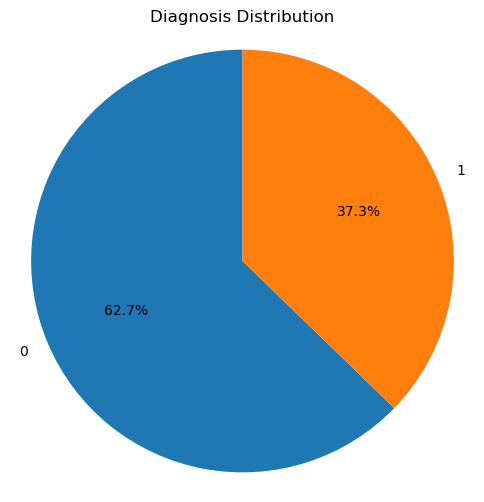

Number of Benign(0): 357
Number of Malignant(1): 212


In [ ]:
diagnosis_counts = df['Diagnosis'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Diagnosis Distribution')
plt.axis('equal')
plt.show()

counts = df['Diagnosis'].value_counts()
print('Number of Benign(0):', counts.get(0, 0))
print('Number of Malignant(1):', counts.get(1, 0))

We notice data imbalance.

#### **Mean Features**

Custom helper function was used to get the summary statstics, KDE Plots, and Box Plots

Descriptive Statistics:



,Mean,Std Dev,Min,25th Percentile,Median,75th Percentile,Max
radius1,14.13,3.52,6.98,11.70,13.37,15.78,28.11
texture1,19.29,4.30,9.71,16.17,18.84,21.80,39.28
perimeter1,91.97,24.30,43.79,75.17,86.24,104.10,188.50
area1,654.89,351.91,143.50,420.30,551.10,782.70,2501.00
smoothness1,0.10,0.01,0.05,0.09,0.10,0.11,0.16
compactness1,0.10,0.05,0.02,0.06,0.09,0.13,0.35
concavity1,0.09,0.08,0.00,0.03,0.06,0.13,0.43
concave_points1,0.05,0.04,0.00,0.02,0.03,0.07,0.20
symmetry1,0.18,0.03,0.11,0.16,0.18,0.20,0.30
fractal_dimension1,0.06,0.01,0.05,0.06,0.06,0.07,0.10


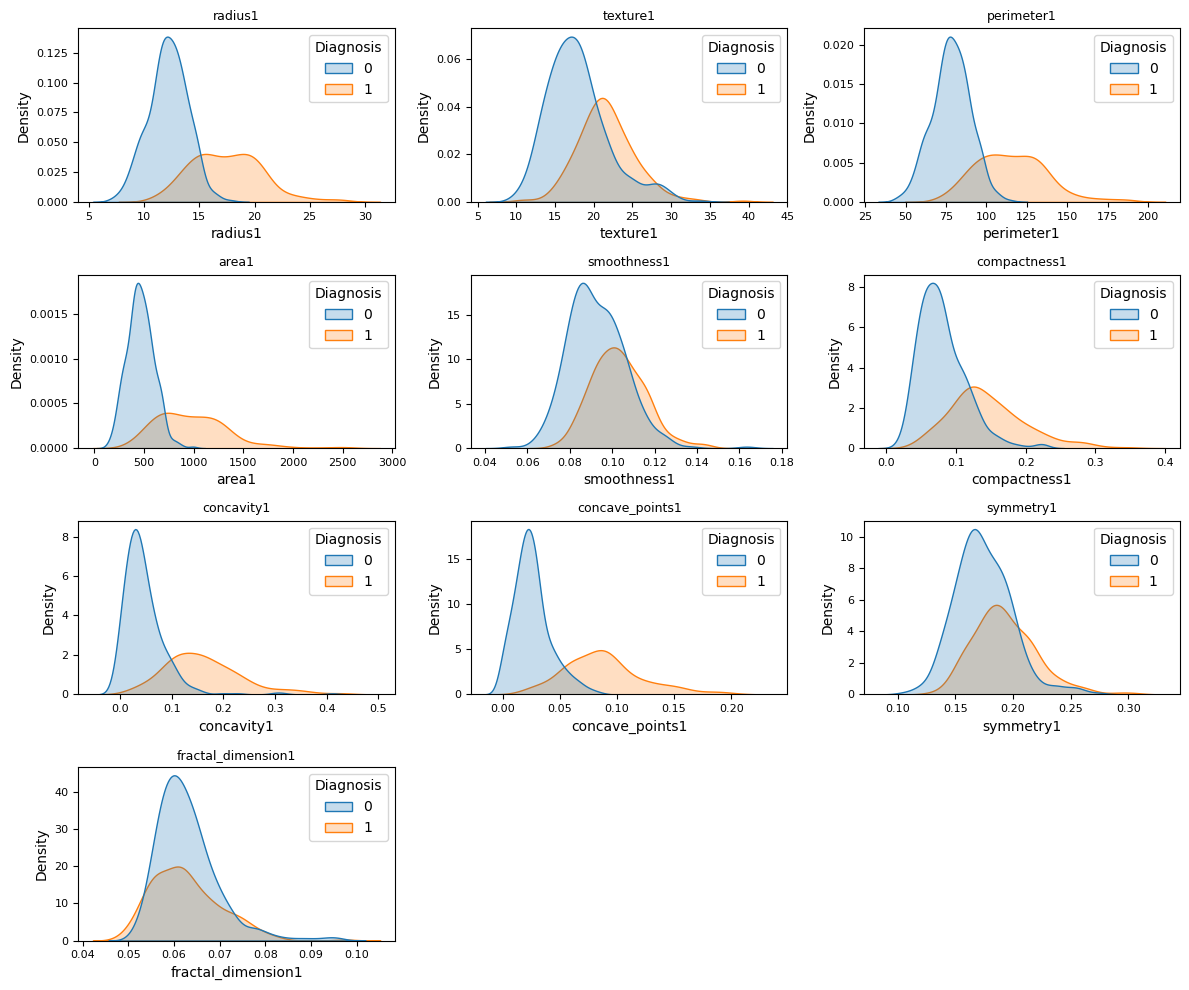

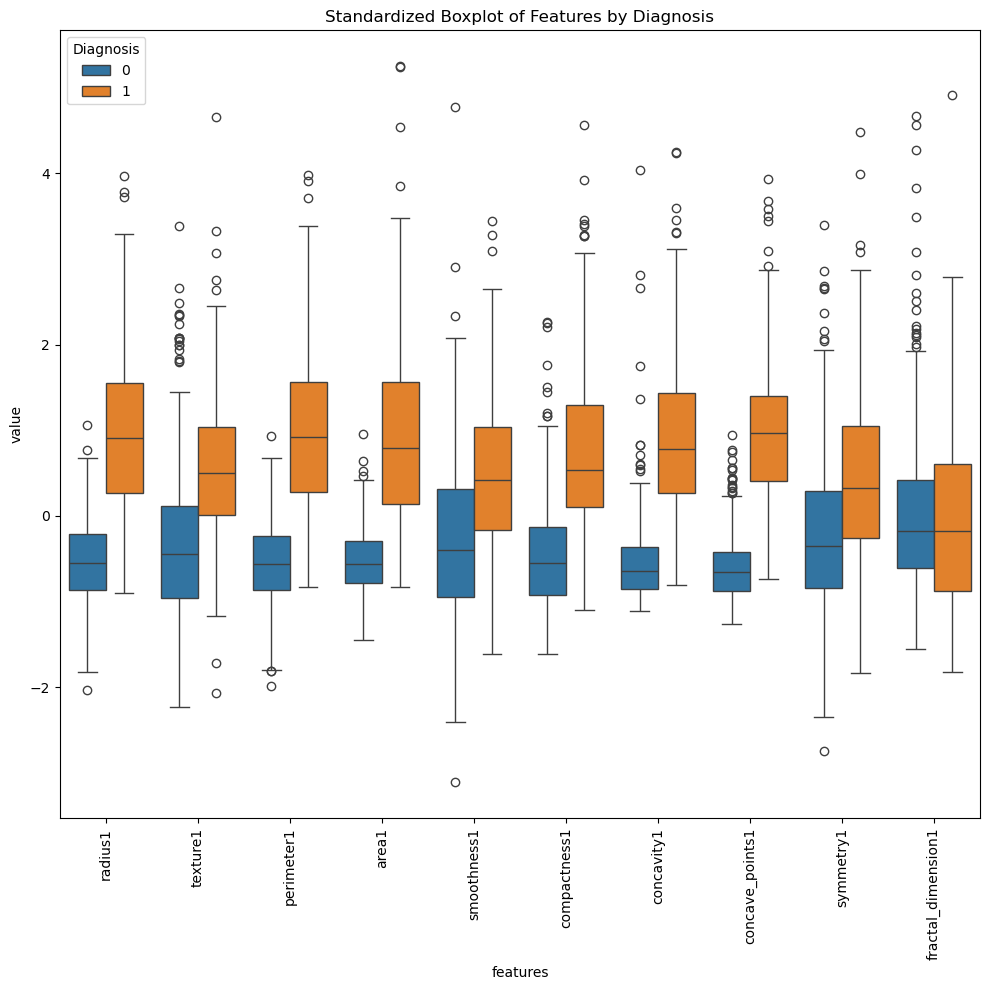

In [ ]:
mean_features = ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
                 'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
                 'fractal_dimension1',]


mf_summary = helper.custom_describe(df, mean_features, plot=True)

#### **Standard Error Features**

Descriptive Statistics:



,Mean,Std Dev,Min,25th Percentile,Median,75th Percentile,Max
radius2,0.41,0.28,0.11,0.23,0.32,0.48,2.87
texture2,1.22,0.55,0.36,0.83,1.11,1.47,4.88
perimeter2,2.87,2.02,0.76,1.61,2.29,3.36,21.98
area2,40.34,45.49,6.80,17.85,24.53,45.19,542.20
smoothness2,0.01,0.00,0.00,0.01,0.01,0.01,0.03
compactness2,0.03,0.02,0.00,0.01,0.02,0.03,0.14
concavity2,0.03,0.03,0.00,0.02,0.03,0.04,0.40
concave_points2,0.01,0.01,0.00,0.01,0.01,0.01,0.05
symmetry2,0.02,0.01,0.01,0.02,0.02,0.02,0.08
fractal_dimension2,0.00,0.00,0.00,0.00,0.00,0.00,0.03


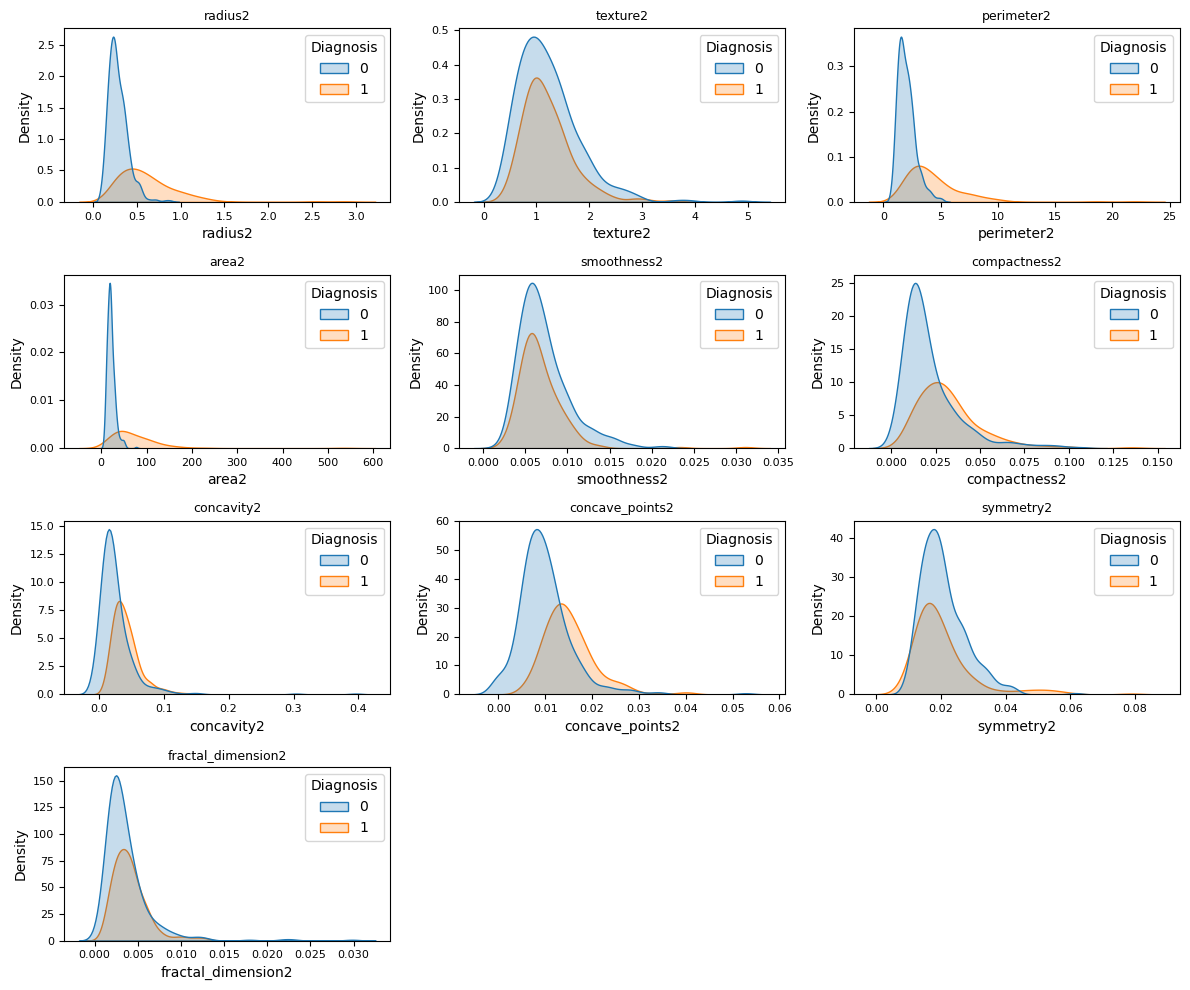

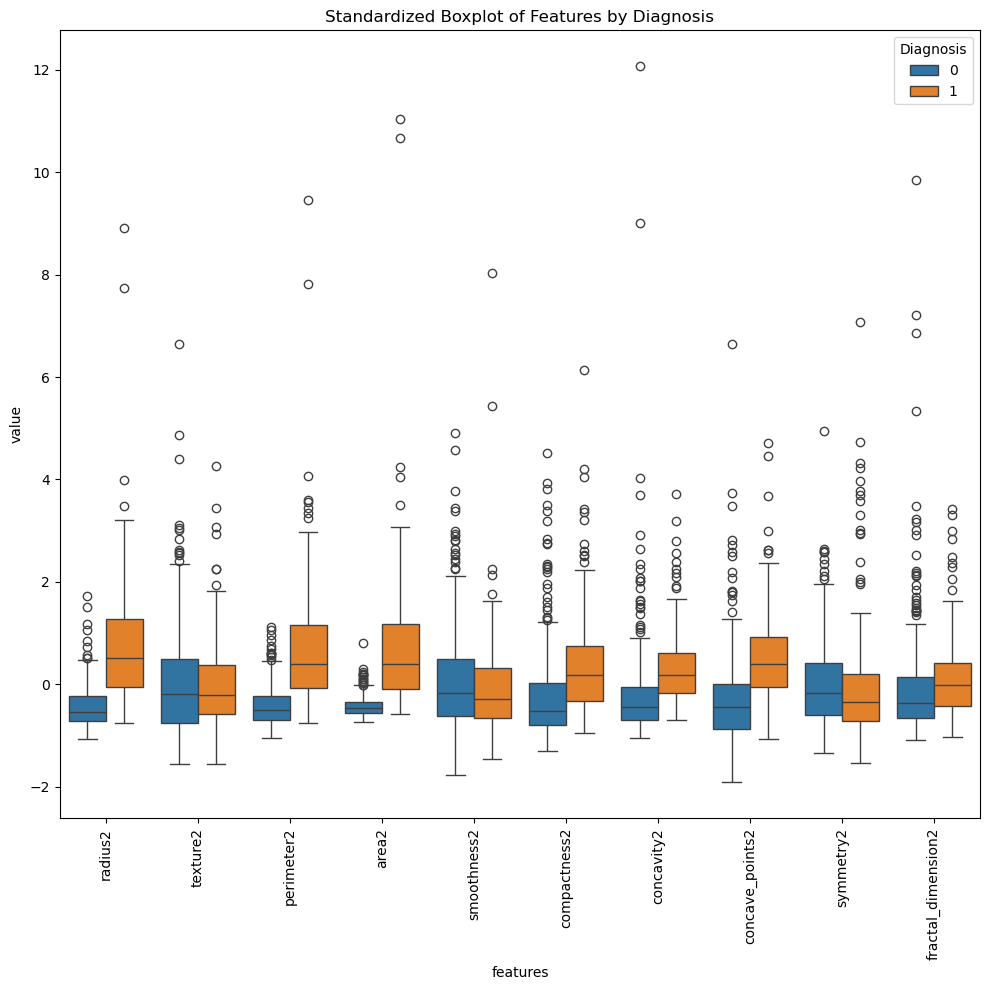

In [ ]:
standerror_features = ['radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2',
                       'compactness2', 'concavity2', 'concave_points2', 'symmetry2',
                       'fractal_dimension2',]


sf_summary = helper.custom_describe(df, standerror_features, plot=True)

#### **Worst Features**

Descriptive Statistics:



,Mean,Std Dev,Min,25th Percentile,Median,75th Percentile,Max
radius3,16.27,4.83,7.93,13.01,14.97,18.79,36.04
texture3,25.68,6.15,12.02,21.08,25.41,29.72,49.54
perimeter3,107.26,33.60,50.41,84.11,97.66,125.40,251.20
area3,880.58,569.36,185.20,515.30,686.50,1084.00,4254.00
smoothness3,0.13,0.02,0.07,0.12,0.13,0.15,0.22
compactness3,0.25,0.16,0.03,0.15,0.21,0.34,1.06
concavity3,0.27,0.21,0.00,0.11,0.23,0.38,1.25
concave_points3,0.11,0.07,0.00,0.06,0.10,0.16,0.29
symmetry3,0.29,0.06,0.16,0.25,0.28,0.32,0.66
fractal_dimension3,0.08,0.02,0.06,0.07,0.08,0.09,0.21


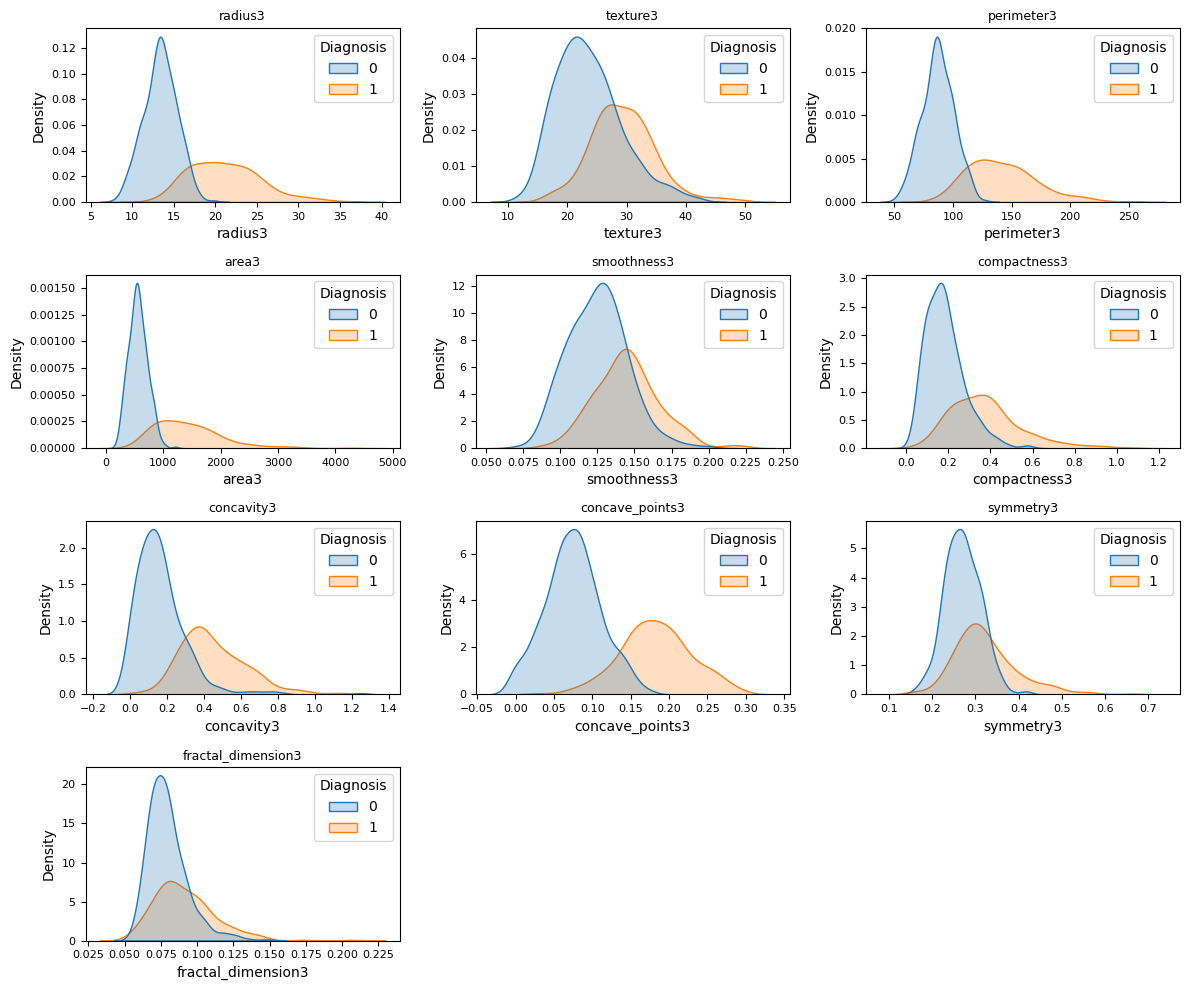

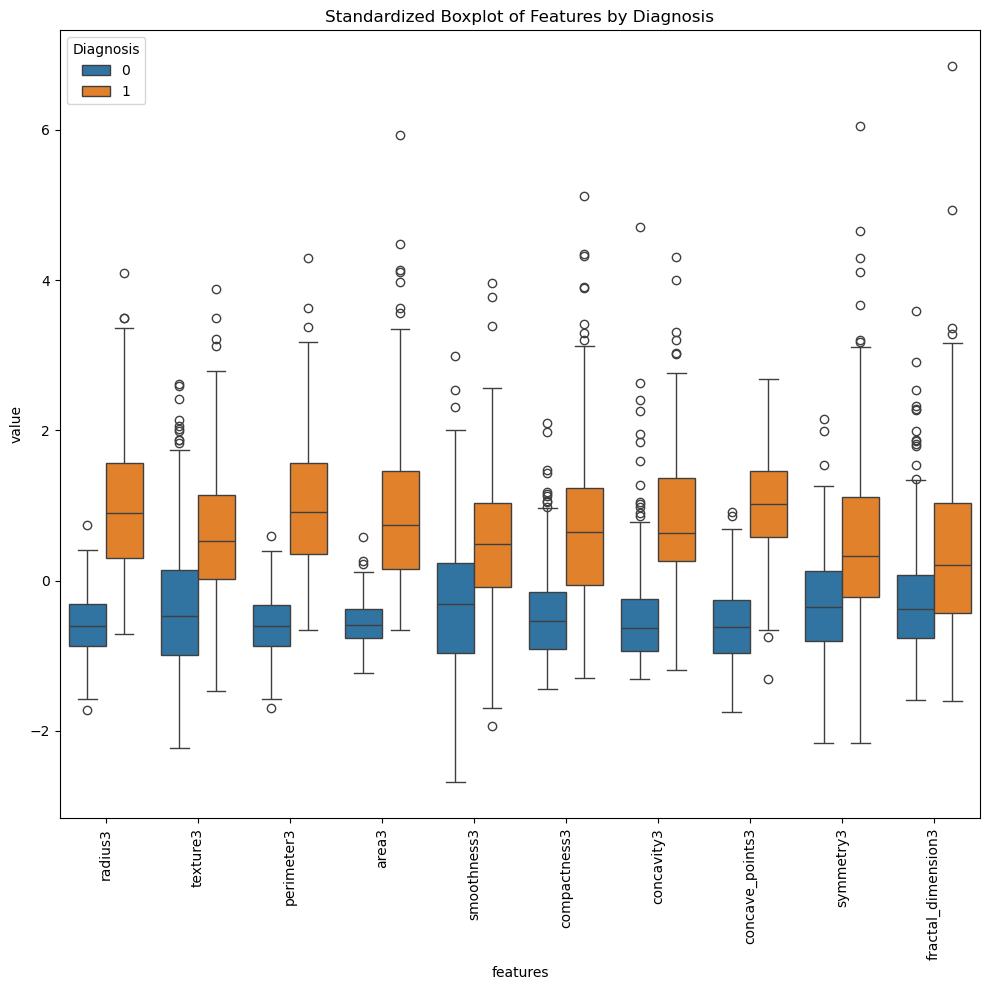

In [ ]:
worst_features = ['radius3', 'texture3','perimeter3', 'area3',
                  'smoothness3','compactness3', 'concavity3',
                  'concave_points3','symmetry3', 'fractal_dimension3']


w_summary = helper.custom_describe(df, worst_features, plot=True)

Major Takeaways:


*   Malignant tumors tend to have more extreme values and higher variability
*   Some features became more informative when measured as “worst” rather than “mean”

These insights help us figure out which features might be most useful in a predictive model but before we jump to that, there’s one more thing we need to understand: **how these features relate to each other**.

### **Correlation Analysis**

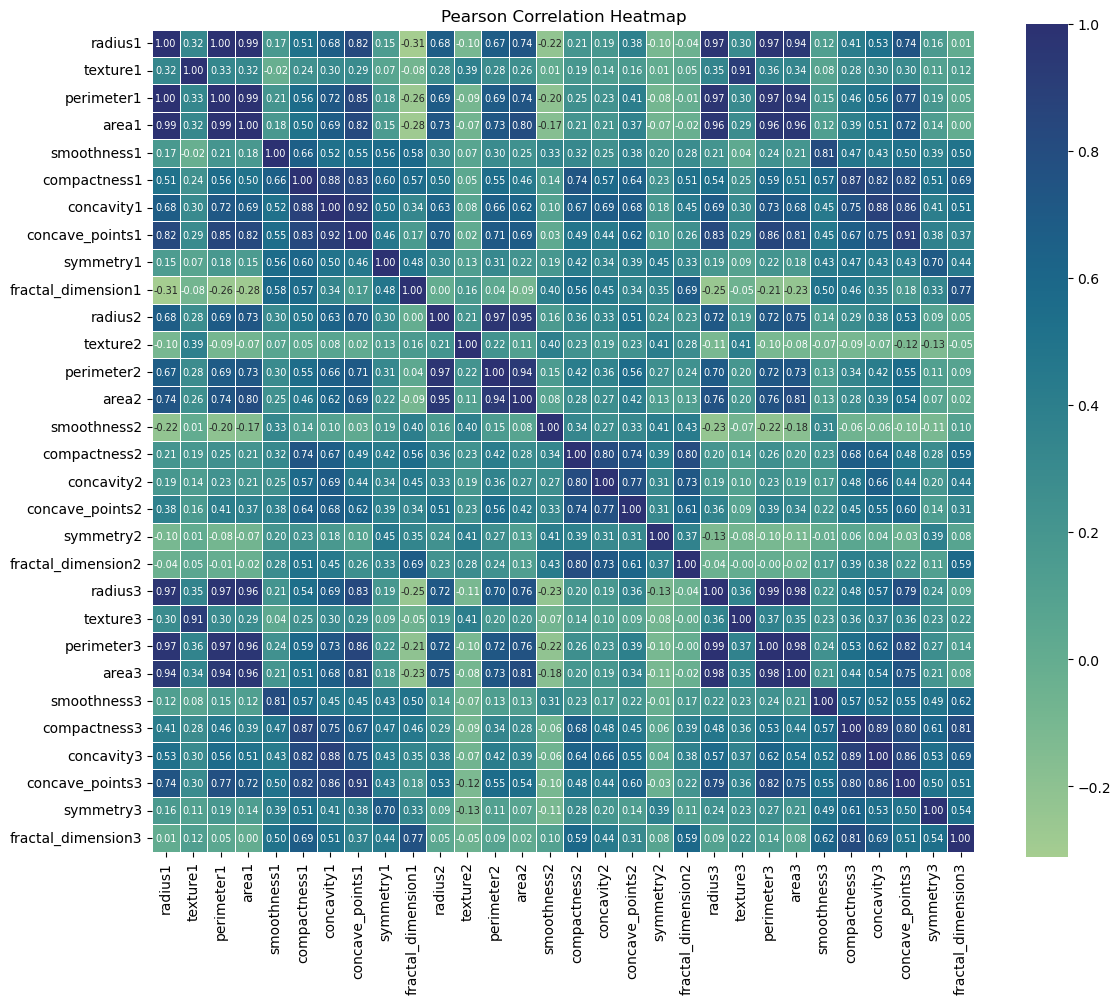

In [ ]:
# Keep only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Compute Pearson correlation matrix
corr_matrix = df_numeric.corr(method='pearson')

# Extract upper triangle (without self-correlations)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Flatten and filter for strong correlations
high_corr_pairs = (
    upper.stack()
    .reset_index()
    .rename(columns={0: 'Correlation', 'level_0': 'Feature 1', 'level_1': 'Feature 2'})
)

#  Plot the annotated heatmap
plt.figure(figsize=(12, 10))  # standard size
sns.heatmap(corr_matrix, cmap='crest', linewidths=0.5, square=True,
            annot=True, fmt='.2f', annot_kws={"size": 7})
plt.title('Pearson Correlation Heatmap')
plt.tight_layout()
plt.show()

In [ ]:
# Filter for high correlation values
threshold = 0.8
high_corr_pairs = high_corr_pairs[abs(high_corr_pairs['Correlation']) > threshold]
high_corr_pairs = high_corr_pairs.sort_values(by='Correlation', ascending=False)

# Display the table
print("Highly Correlated Feature Pairs (|Pearson r| > 0.8):\n")
print(high_corr_pairs)

Highly Correlated Feature Pairs (|Pearson r| > 0.8):

           Feature 1           Feature 2  Correlation
1            radius1          perimeter1     0.997855
391          radius3          perimeter3     0.993708
2            radius1               area1     0.987357
57        perimeter1               area1     0.986507
392          radius3               area3     0.984015
407       perimeter3               area3     0.977578
246          radius2          perimeter2     0.972794
76        perimeter1          perimeter3     0.970387
19           radius1             radius3     0.969539
74        perimeter1             radius3     0.969476
21           radius1          perimeter3     0.965137
100            area1             radius3     0.962746
103            area1               area3     0.959213
102            area1          perimeter3     0.959120
247          radius2               area2     0.951830
77        perimeter1               area3     0.941550
22           radius1        

**Major Takeaways:**

*   radius1, perimeter1, and area1 are highly correlated, which makes sense since they’re all related to cell size.
*   Some features are almost redundant, like concavity1 and concave_points1 because they measure very similar aspects.
*   Others, like fractal_dimension1, don’t correlate much with anything, which might make them uniquely useful.

This step gives us a good starting point for feature selection, which helps in building a parsimonious model.

## **Feature Selection & Dimensionality Reduction**

Why reduce features?

* **Simplicity:** fewer features = faster models = easier to use

* **Avoiding Redundancy:** If multiple features are telling us the same thing (like radius1, area1, and perimeter), we can probably keep just one of them and lose very little information.

* **Avoiding Overfitting:** too many overlapping features and the model starts memorizing noise.

#### **Principal Component Analysis**

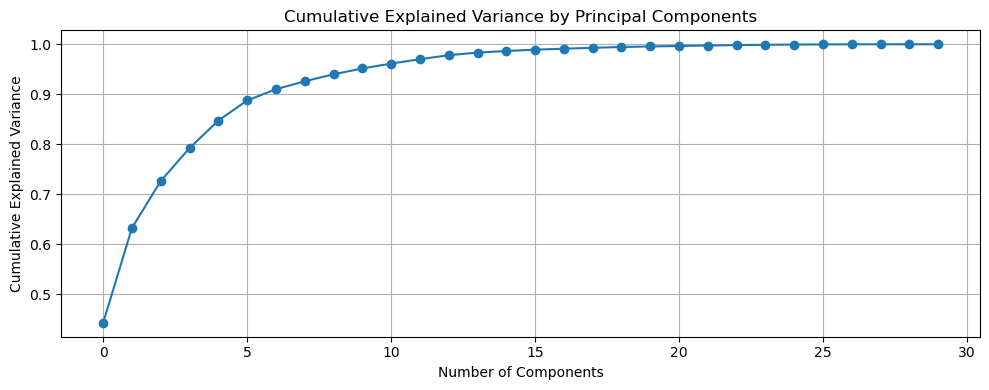

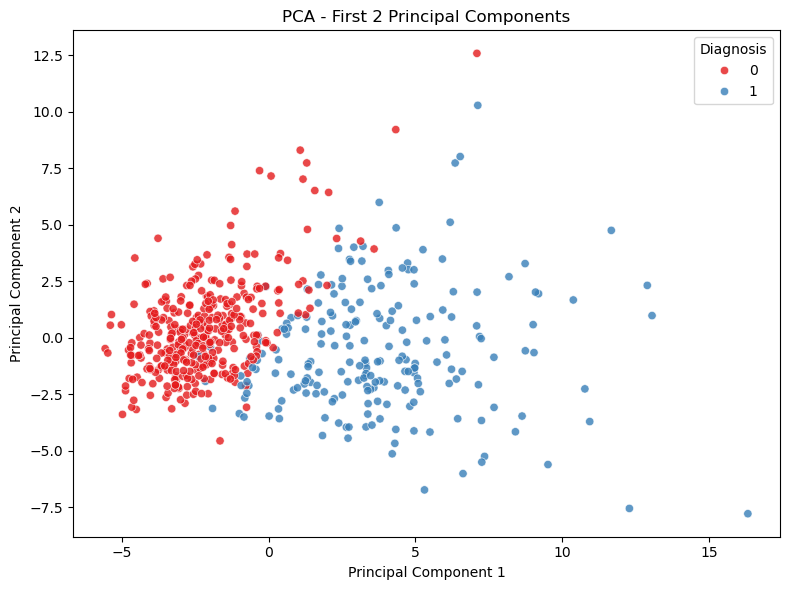

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. saving numeric features in
X = df_numeric

# 2. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Run PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 4. Create DataFrame with PCA results
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pca_columns)
df_pca['Diagnosis'] = df['Diagnosis'].values  # add labels back for visualization

# 5. Plot Explained Variance
plt.figure(figsize=(10, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Plot PCA in 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Diagnosis', palette='Set1', alpha=0.8)
plt.title('PCA - First 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Diagnosis')
plt.tight_layout()
plt.show()

In [ ]:
# saving in a list
features = df_numeric.columns.tolist()

# Get PCA loadings
loadings = pd.DataFrame(
    pca.components_[:10],  # Top 10 PCs
    columns=features,
    index=[f'PC{i+1}' for i in range(10)]
)

# Show loadings table
print("Top 10 Principal Components - Feature Contributions (Loadings):\n")
print(loadings.T)  # Transpose for easier reading

Top 10 Principal Components - Feature Contributions (Loadings):

                         PC1       PC2       PC3       PC4       PC5  \
radius1             0.218902 -0.233857 -0.008531 -0.041409 -0.037786   
texture1            0.103725 -0.059706  0.064550  0.603050  0.049469   
perimeter1          0.227537 -0.215181 -0.009314 -0.041983 -0.037375   
area1               0.220995 -0.231077  0.028700 -0.053434 -0.010331   
smoothness1         0.142590  0.186113 -0.104292 -0.159383  0.365089   
compactness1        0.239285  0.151892 -0.074092 -0.031795 -0.011704   
concavity1          0.258400  0.060165  0.002734 -0.019123 -0.086375   
concave_points1     0.260854 -0.034768 -0.025564 -0.065336  0.043861   
symmetry1           0.138167  0.190349 -0.040240 -0.067125  0.305941   
fractal_dimension1  0.064363  0.366575 -0.022574 -0.048587  0.044424   
radius2             0.205979 -0.105552  0.268481 -0.097941  0.154456   
texture2            0.017428  0.089980  0.374634  0.359856  0.191651   

In [ ]:
for i in range(10):
    print(f"\nTop features for PC{i+1}:")
    print(loadings.T.iloc[:, i].abs().sort_values(ascending=False).head(10))


Top features for PC1:
concave_points1    0.260854
concavity1         0.258400
concave_points3    0.250886
compactness1       0.239285
perimeter3         0.236640
concavity3         0.228768
radius3            0.227997
perimeter1         0.227537
area3              0.224871
area1              0.220995
Name: PC1, dtype: float64

Top features for PC2:
fractal_dimension1    0.366575
fractal_dimension2    0.280092
fractal_dimension3    0.275339
radius1               0.233857
compactness2          0.232716
area1                 0.231077
radius3               0.219866
area3                 0.219352
perimeter1            0.215181
smoothness2           0.204430
Name: PC2, dtype: float64

Top features for PC3:
texture2              0.374634
smoothness2           0.308839
symmetry2             0.288584
symmetry3             0.271313
radius2               0.268481
perimeter2            0.266645
smoothness3           0.259798
compactness3          0.236076
fractal_dimension3    0.232791
concave_po

We can see that the first 5 components capture most of the variation in the dataset. Beyond that, each additional component adds very little. So, let’s decide to keep the first five components.

#### **Correaltion between the five features**

In [ ]:
n_components = 5
X_pca_n = X_pca[:, :n_components]  # first 10 components

In [ ]:
pca_features = pd.DataFrame(X_pca_n, columns=[f'PC{i+1}' for i in range(n_components)])

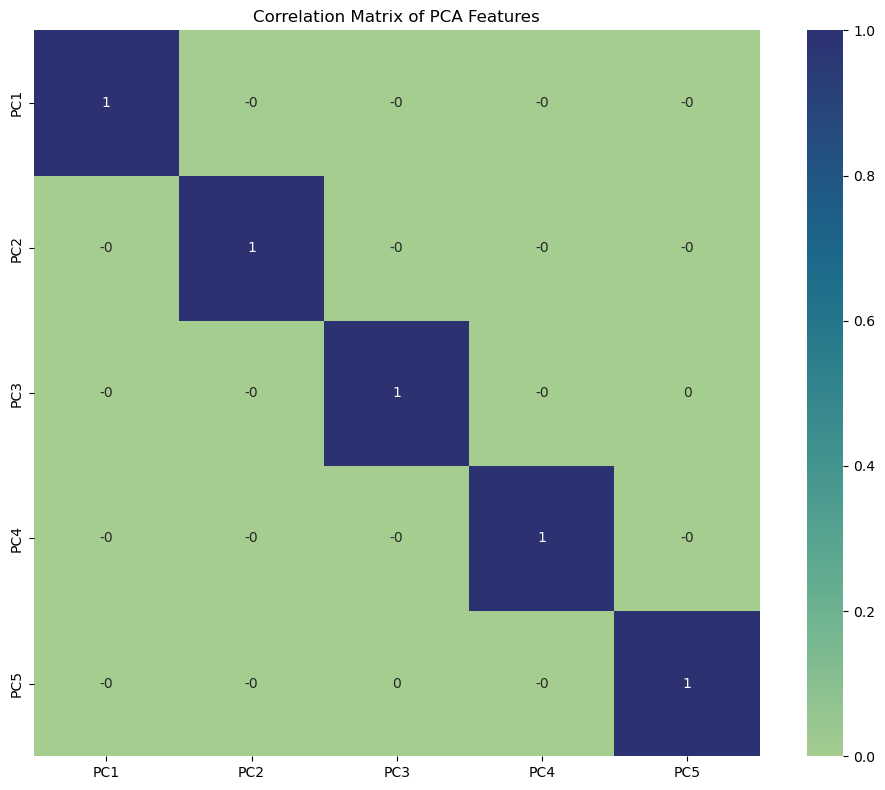

In [ ]:
corr = pca_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr.round(2), annot=True, cmap='crest', square=True)
plt.title("Correlation Matrix of PCA Features")
plt.tight_layout()
plt.show()

No correlation found, we name the components based on how the original features are influencing them.

- PC1: contour_shape -> concave + area + radius + perimeter
- PC2: fractal_border -> top 3 features are fractal
- PC3: texture_smoothness -> texture + symmetry + smoothness
- PC4: texture_intensity -> top 3 features are texture  
- PC5: smoothness -> symmetry + fractal + concavity

In [ ]:
# Select the first 5 principal components
X_pca_5 = X_pca[:, :5]

# Create DataFrame and rename columns
pca_df = pd.DataFrame(X_pca_5, columns=[
    'Contour_Shape',
    'Fractal_Border',
    'Texture_Smoothness',
    'Texture_Intensity',
    'Surface_Smoothness'
])

# Add the target variable
pca_df['Diagnosis'] = df['Diagnosis'].values

# Preview the final dataset
print(pca_df.head())

   Contour_Shape  Fractal_Border  Texture_Smoothness  Texture_Intensity  \
0       9.192837        1.948583           -1.123166          -3.633731   
1       2.387802       -3.768172           -0.529293          -1.118264   
2       5.733896       -1.075174           -0.551748          -0.912083   
3       7.122953       10.275589           -3.232790          -0.152547   
4       3.935302       -1.948072            1.389767          -2.940639   

   Surface_Smoothness Diagnosis  
0            1.195110         1  
1           -0.621775         1  
2            0.177086         1  
3            2.960878         1  
4           -0.546747         1  


In [ ]:
# Export PCA data to CSV
pca_df.to_csv("pca_data.csv", index=False)